Index(['Age', 'Potential', 'Value', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes'],
      dtype='object')
Index(['Age', 'Potential', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes', 'Value_of_log'],
      dtype='object')
Multiple Linear Regression Model Summary
----------------------------------------
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
R-squared (R²): 0.93
----------------------------------------
Model Coefficients:
Age: -0.3947
Potential: -0.0316
GKDiving: 0.1652
GKHandling: 0.1316
GKKicking: 0.0279
GKPositioning: 0.1232
GKReflexes: 0.2062
----------------------------------------
Intercept: 5.9893


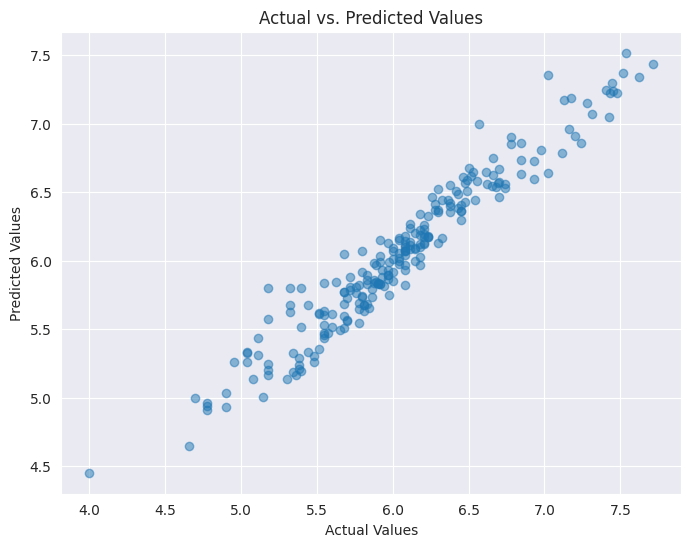

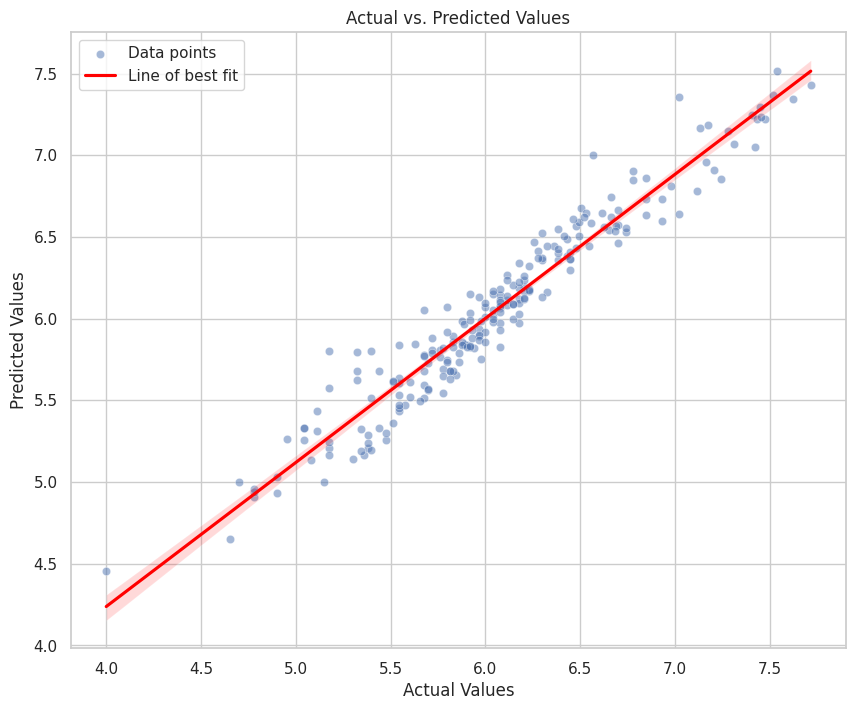

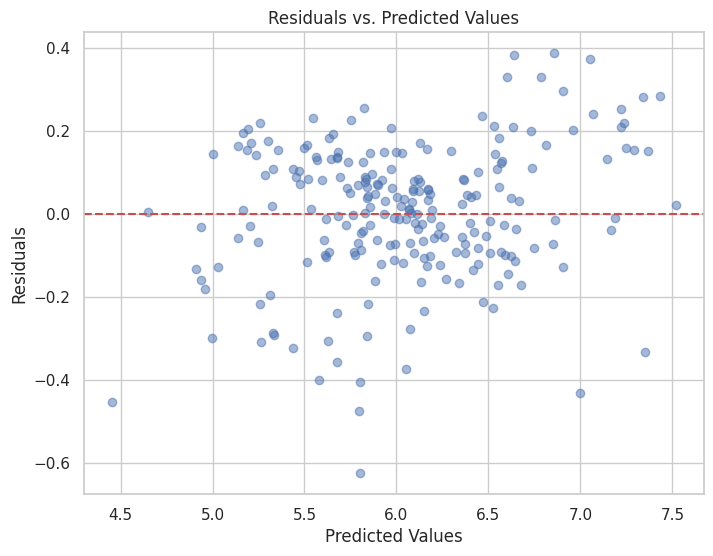

In [ ]:
import pandas as pd # importing pandas
pd.set_option('display.max_columns', 10) # set display option to change appearance of dataframe
pd.set_option('display.max_rows', 10)
import numpy as np # import numpy
import matplotlib.pyplot as plt # importing plot from matplotlib lib, magic fn which prints plot in output cell
%matplotlib inline
from math import pi # import pi value = 3.74
import seaborn as sns # importing seaborn lib
sns.set_style(style='darkgrid') # set style of plot
import warnings # import warning lib
warnings.filterwarnings('ignore')
import missingno as msno #importing missingno library to see null values clearly
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from google.colab import drive

# Load the dataset
gk = pd.read_csv('final-gk.csv')
print(gk.columns)


gk['Value_of_log'] = np.log10(gk['Value'])

useless_columns = ['Value']
gk = gk.drop(useless_columns, axis=1)
print(gk.columns)

X = gk[['Age', 'Potential', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes']]

y = gk['Value_of_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

# Predict the target variable
y_pred = mlr_model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the summary
print("Multiple Linear Regression Model Summary")
print("----------------------------------------")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("----------------------------------------")
print("Model Coefficients:")
for feature, coef in zip(X.columns, mlr_model.coef_):
    print(f"{feature}: {coef:.4f}")
print("----------------------------------------")
print(f"Intercept: {mlr_model.intercept_:.4f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
ax = sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label='Data points')
sns.regplot(x=y_test, y=y_pred, scatter=False, ax=ax, color='red', label='Line of best fit')

# Add titles and labels
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Create a scatter plot of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()
